# Shakespeare's plays

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Colecting the data from the csv file

In [3]:
all_data = pd.read_csv("Shakespeare_data.csv", sep=",").dropna()

In [4]:
all_data.head()

Dataline      Play  PlayerLinenumber ActSceneLine         Player  \
3         4  Henry IV               1.0        1.1.1  KING HENRY IV   
4         5  Henry IV               1.0        1.1.2  KING HENRY IV   
5         6  Henry IV               1.0        1.1.3  KING HENRY IV   
6         7  Henry IV               1.0        1.1.4  KING HENRY IV   
7         8  Henry IV               1.0        1.1.5  KING HENRY IV   

                                       PlayerLine  
3          So shaken as we are, so wan with care,  
4      Find we a time for frighted peace to pant,  
5  And breathe short-winded accents of new broils  
6         To be commenced in strands afar remote.  
7       No more the thirsty entrance of this soil

In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105152 entries, 3 to 111394
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Dataline          105152 non-null  int64  
 1   Play              105152 non-null  object 
 2   PlayerLinenumber  105152 non-null  float64
 3   ActSceneLine      105152 non-null  object 
 4   Player            105152 non-null  object 
 5   PlayerLine        105152 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.6+ MB


In [6]:
Hamlet = all_data[(all_data["Play"] == "Hamlet")]
King_Lear = all_data[(all_data["Play"] == "King Lear")]
Julius_Caesar = all_data[(all_data["Play"] == "Julius Caesar")]
macbeth = all_data[(all_data["Play"] == "macbeth")]
Merchant_of_Venice = all_data[(all_data["Play"] == "Merchant of Venice")]
A_Midsummer_nights_dream = all_data[(all_data["Play"] == "A Midsummer nights dream")]
Othello = all_data[(all_data["Play"] == "Othello")]
Romeo_and_Juliet = all_data[(all_data["Play"] == "Romeo and Juliet")]
data = all_data[(all_data["Play"].isin(["A Midsummer nights dream", "Hamlet", "Julius Caesar", 
                                        "King Lear", "macbeth", "Merchant of Venice", "Othello", "Romeo and Juliet"]))]

In [7]:
data.Play.value_counts()

Hamlet                      4020
Othello                     3563
King Lear                   3500
Romeo and Juliet            3096
Merchant of Venice          2665
Julius Caesar               2597
macbeth                     2390
A Midsummer nights dream    2162
Name: Play, dtype: int64

In [8]:
data.isnull().sum()

Dataline            0
Play                0
PlayerLinenumber    0
ActSceneLine        0
Player              0
PlayerLine          0
dtype: int64

In [9]:
Play_Count =data['Play'].value_counts()
Play_Count

Hamlet                      4020
Othello                     3563
King Lear                   3500
Romeo and Juliet            3096
Merchant of Venice          2665
Julius Caesar               2597
macbeth                     2390
A Midsummer nights dream    2162
Name: Play, dtype: int64

### Number of players in each play

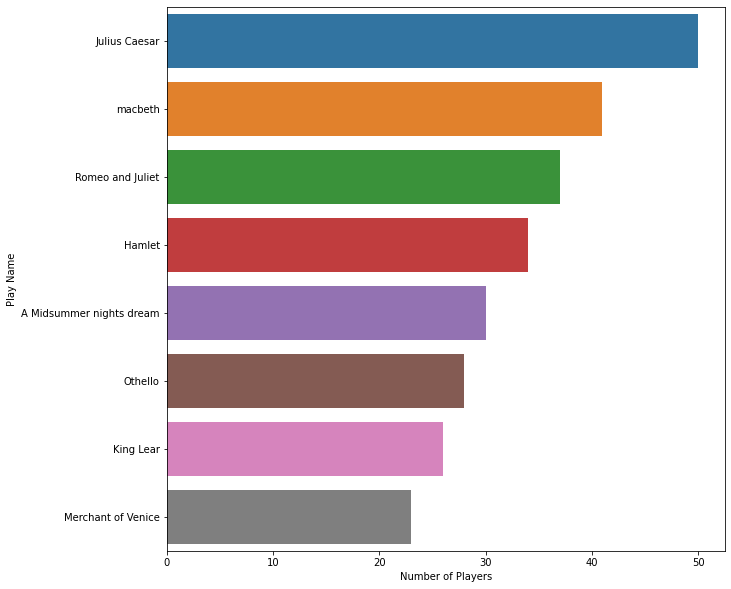

In [10]:
numberPlayers = data.groupby(['Play'])['Player'].nunique().sort_values(ascending= False).to_frame()
numberPlayers['Play'] = numberPlayers.index.tolist()
numberPlayers.columns = ['Num Players','Play']
numberPlayers.index= np.arange(0,len(numberPlayers))
numberPlayers

plt.figure(figsize=(10,10))
ax = sns.barplot(x='Num Players',y='Play',data=numberPlayers)
ax.set(xlabel='Number of Players', ylabel='Play Name')
plt.show()

### Number of lines in each play

<AxesSubplot:>

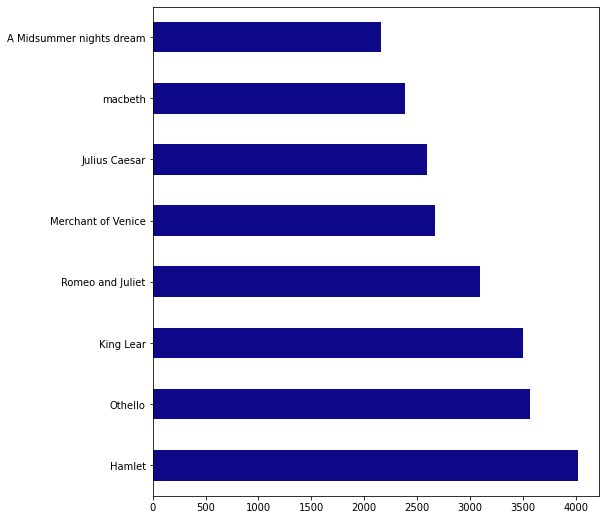

In [9]:
Play_Count.plot(kind='barh',label='Play Count',figsize=(8,9),colormap='plasma')

<AxesSubplot:>

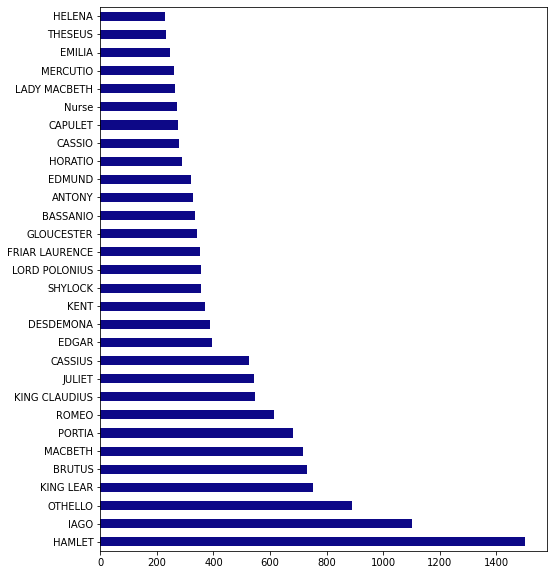

In [10]:
Player_Count =data['Player'].value_counts()[:30]
Player_Count.plot(kind='barh',label='Player Count Top 30',figsize=(8,10),colormap='plasma')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

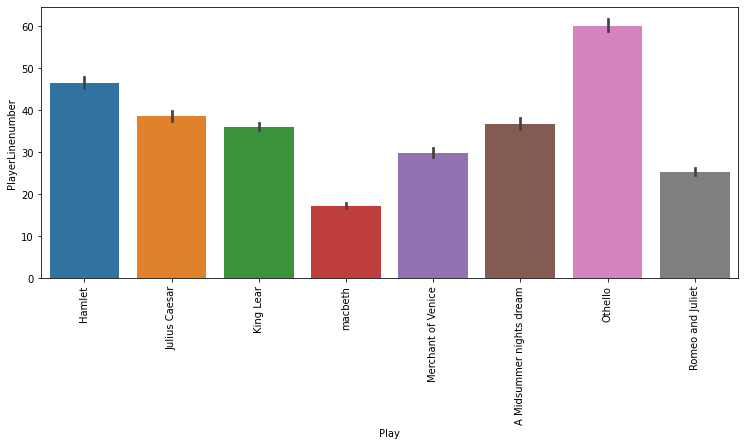

In [11]:
plt.rcParams['figure.figsize']=(12.5,5)
ax= sns.barplot(x='Play',y='PlayerLinenumber',data=data)
plt.setp(ax.get_xticklabels(), rotation=90)

In [11]:
all_word = pd.Series(all_data['PlayerLine'].tolist()).astype(str)
word = pd.Series(data['PlayerLine'].tolist()).astype(str)
Hamlet_word = pd.Series(Hamlet['PlayerLine'].tolist()).astype(str)
King_Lear_word = pd.Series(King_Lear['PlayerLine'].tolist()).astype(str)
Julius_Caesar_word = pd.Series(Julius_Caesar['PlayerLine'].tolist()).astype(str)
macbeth_word = pd.Series(macbeth['PlayerLine'].tolist()).astype(str)
Merchant_of_Venice_word = pd.Series(Merchant_of_Venice['PlayerLine'].tolist()).astype(str)
A_Midsummer_nights_dream_word = pd.Series(A_Midsummer_nights_dream['PlayerLine'].tolist()).astype(str)
Othello_word = pd.Series(Othello['PlayerLine'].tolist()).astype(str)
Romeo_and_Juliet_word = pd.Series(Romeo_and_Juliet['PlayerLine'].tolist()).astype(str)


Creating a WordCloud to se which words appear the most in

Hamlet


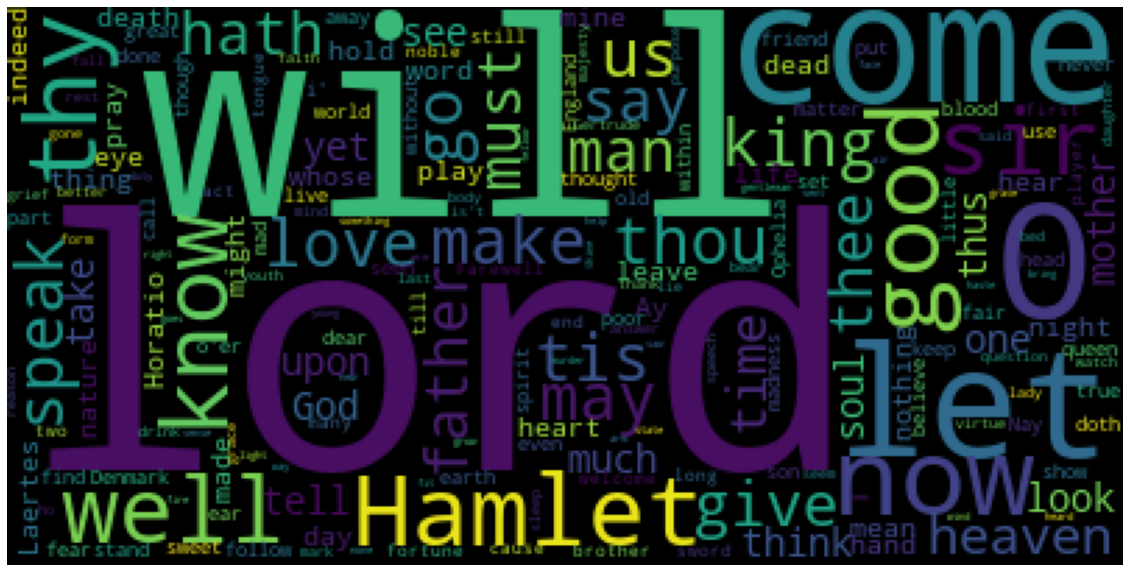

Julius Caesar


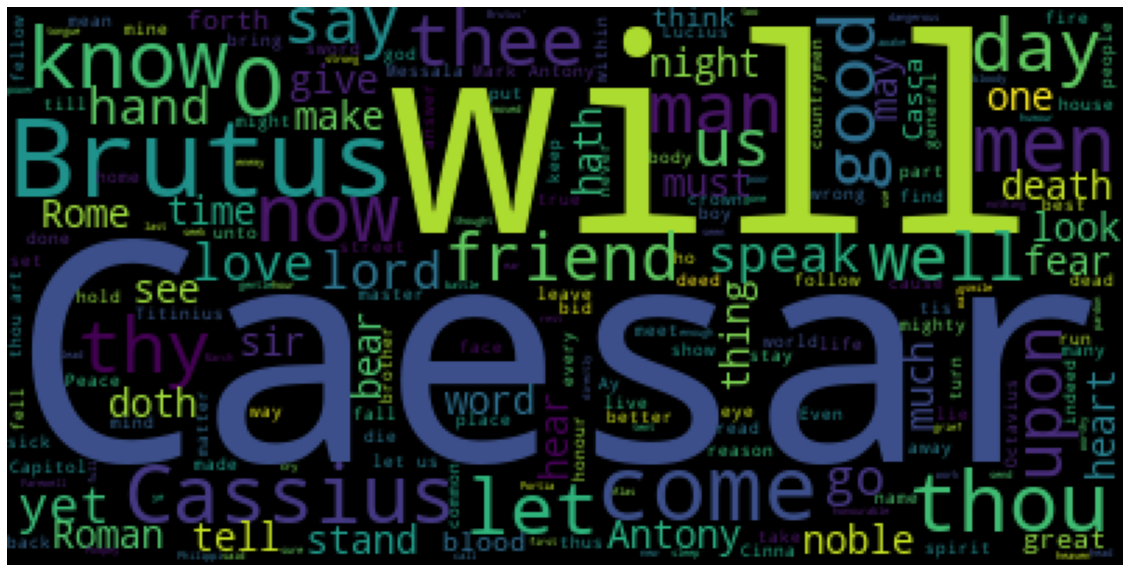

King Lear


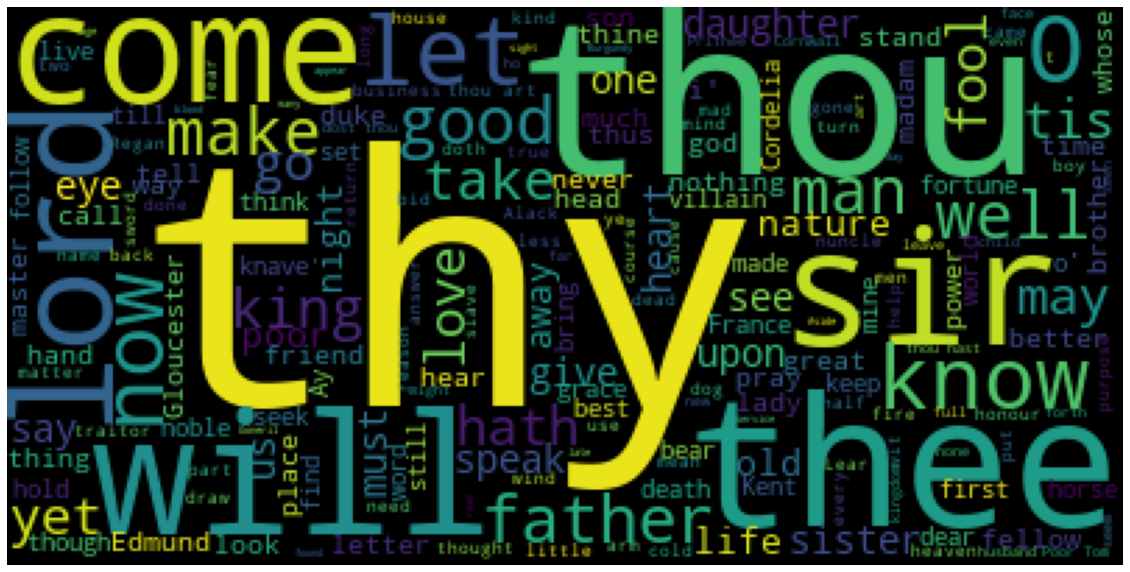

macbeth


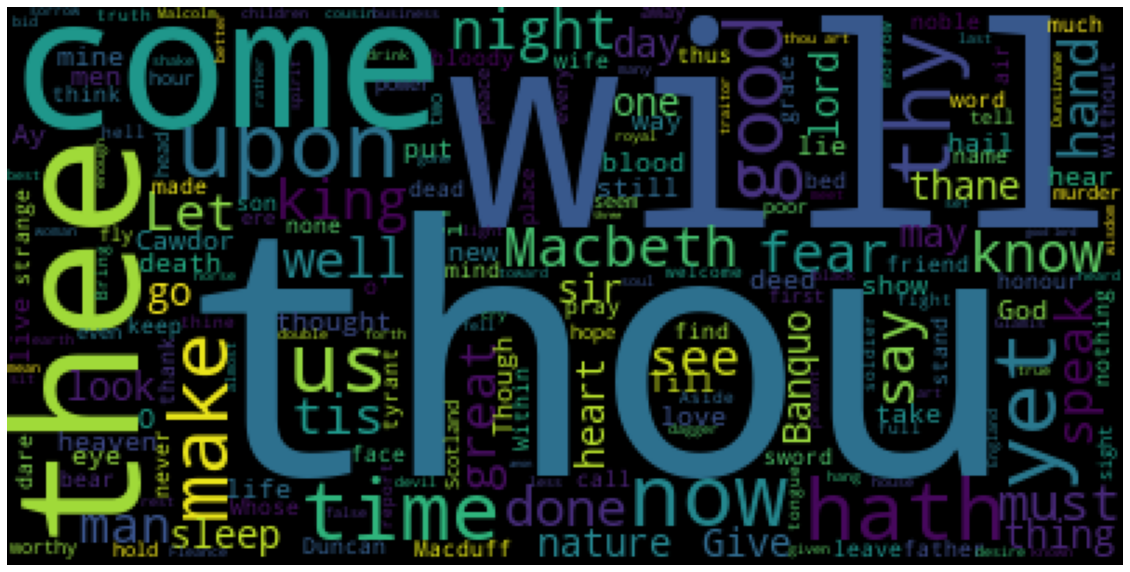

Merchant of Venice


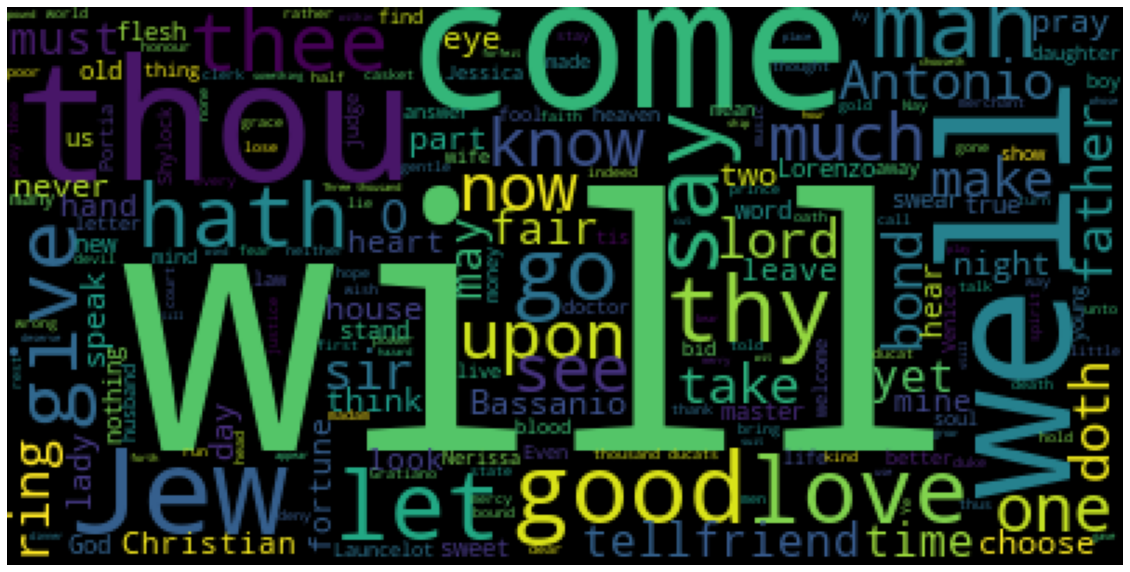

A Midsummer nights dream


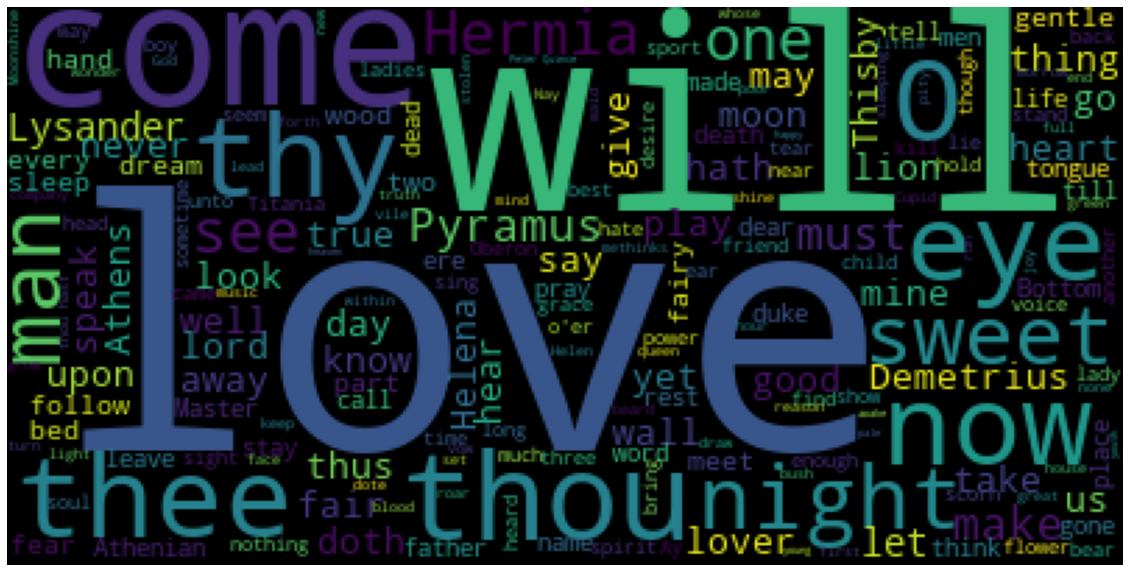

Othello


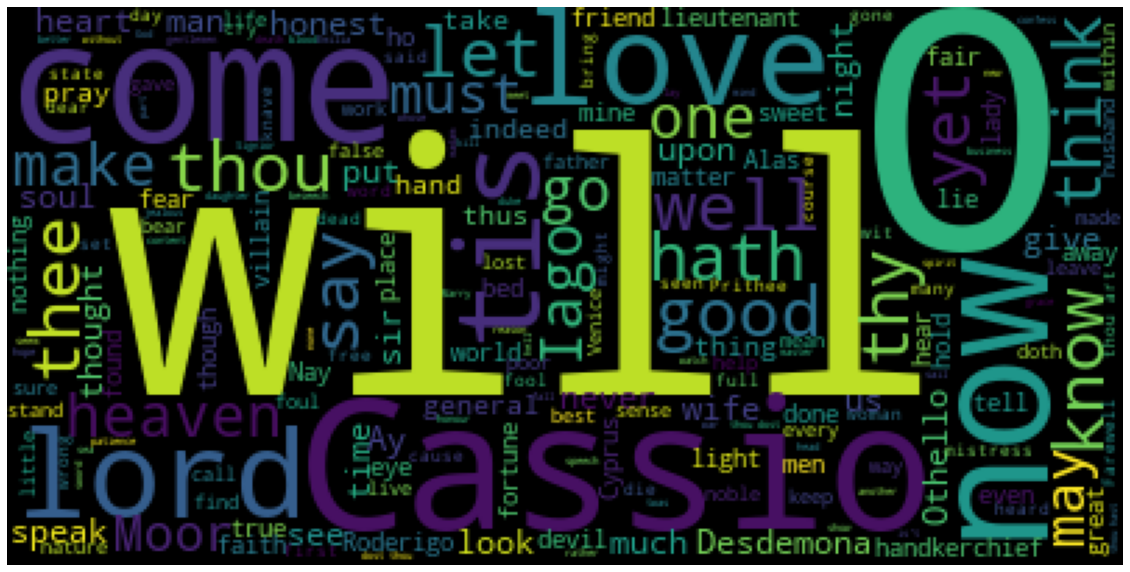

Romeo and Juliet


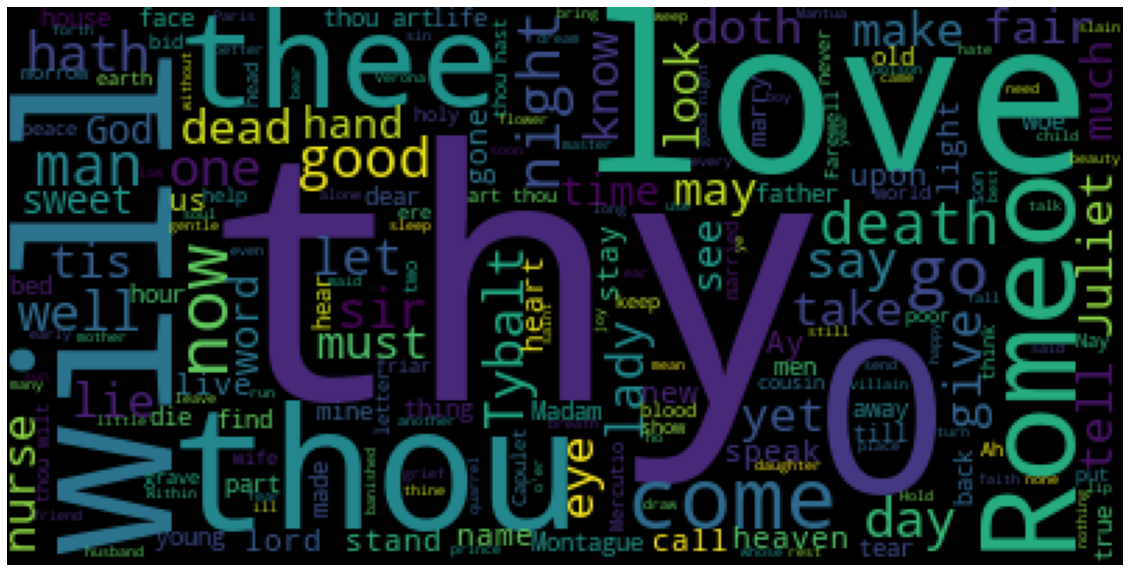

In [14]:
from wordcloud import WordCloud

play_name = data['Play'].unique().tolist()
for play in play_name:
    word = pd.Series(data[data["Play"] == play]["PlayerLine"].tolist()).astype(str)
    cloud = WordCloud(margin=0, max_font_size=125).generate(' '.join(word.astype(str)))
    print(play)
    plt.figure(figsize=(20,15)) 
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

### Sentiment Analysis